# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
"""
Setup Script: Install Required Libraries for Image Captioning Project

This script installs all the dependencies needed for the Eye for Blind project.
It includes libraries for text-to-speech, word cloud generation, image processing, and TensorFlow.

Commands:
- Run this script in a Python environment with internet access.
- Use `pip` to install the required libraries.

Author: Prem Kumar Subudhi
Date: 22-11-2014
"""

# Text-to-Speech (TTS) library for generating audio from captions
!pip install gTTS  # Google's TTS API
!pip install playsound  # To play audio files locally

# Word Cloud library for visualizing word frequencies
!pip install wordcloud

# Image Processing and Machine Learning libraries
!pip install scikit-image  # Image processing tools (resize, filters, etc.)
!pip install tensorflow  # Deep Learning framework (CNNs, RNNs, etc.)
!pip install imageio
# Optional: Ensure package versions match project requirements
"""
NOTE:
If you encounter issues with TensorFlow (e.g., GPU compatibility), ensure that your environment matches TensorFlow's
requirements for CUDA and cuDNN. Refer to TensorFlow's official documentation for details:
https://www.tensorflow.org/install
"""


  Using cached gTTS-2.5.4-py3-none-any.whl (29 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 4.4.0 requires docutils<0.18,>=0.14, but you have docutils 0.19 which is incompatible.
sphinx-rtd-theme 1.0.0 requires docutils<0.18, but you have docutils 0.19 which is incompatible.
pycaret 2.3.8 requires pyyaml<6.0.0, but you have pyyaml 6.0 which is incompatible.
pycaret 2.3.8 requires scikit-learn==0.23.2, but you have scikit-learn 0.24.0 which is incompatible.
pandas-profiling 3.0.0 requires tangled-up-in-unicode==0.1.0, but you have tangled-up-in-unicode 0.2.0 which is incompatible.
apache-airflow 2.3.3 requires attrs<21.0,>=20.0, but 

"\nNOTE:\nIf you encounter issues with TensorFlow (e.g., GPU compatibility), ensure that your environment matches TensorFlow's\nrequirements for CUDA and cuDNN. Refer to TensorFlow's official documentation for details:\nhttps://www.tensorflow.org/install\n"

In [2]:
"""
System and Google Drive Setup for Image Captioning Project

This script performs the following:
1. Garbage Collection: Releases unused memory to optimize performance.
2. Google Drive Mount: Connects the Colab environment to Google Drive for file access.

"""

# Step 1: Import the garbage collection (gc) module to manage memory
import gc

# Free unused memory
gc.collect()
"""
Garbage collection:
- The `gc.collect()` method forces a garbage collection process, reclaiming memory occupied by objects
  that are no longer in use.
- Useful in large projects to prevent memory leaks and optimize resource usage.
"""


'\nGarbage collection:\n- The `gc.collect()` method forces a garbage collection process, reclaiming memory occupied by objects\n  that are no longer in use.\n- Useful in large projects to prevent memory leaks and optimize resource usage.\n'

In [3]:
"""
Library Imports for Image Captioning Project

This script imports all the required libraries for:
1. File and Memory Management
2. Data Manipulation and Processing
3. Text Processing and Evaluation
4. Image Processing and Visualization
5. Deep Learning with TensorFlow and Keras

"""

# ======================
# 1. File and Memory Management
# ======================
import os  # For file and directory operations
import io
import imageio.v3 as iio  # Import imageio for image reading
import gc  # Garbage collection for memory optimization
import time  # Measure code execution time
import glob  # File path matching
from collections import Counter  # Count occurrences of elements in collections
from tqdm import tqdm  # Display progress bars for loops
from IPython import display  # IPython utilities for Jupyter notebooks
#from gtts import gTTS  # Google Text-to-Speech for audio output
import seaborn as sns
# ======================
# 2. Data Manipulation and Processing
# ======================
import numpy as np  # Numerical operations and arrays
import pandas as pd  # Data manipulation and analysis
from sklearn.model_selection import train_test_split  # Split datasets into training and testing sets

# ======================
# 3. Text Processing and Evaluation
# ======================
import string  # String operations (e.g., punctuation handling)
import nltk  # Natural Language Toolkit for text processing
from nltk.tokenize import word_tokenize  # Tokenize text into words
from nltk.translate.bleu_score import sentence_bleu  # BLEU score for evaluating text generation
from keras.preprocessing.image import load_img
# ======================
# 4. Image Processing and Visualization
# ======================
from PIL import Image  # Image manipulation and processing
import matplotlib.pyplot as plt  # Plotting and visualization

# ======================
# 5. Deep Learning with TensorFlow and Keras
# ======================
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence preprocessing
from tensorflow import keras  # Keras high-level API
from keras.models import Model  # Keras functional model API
from keras import Input, layers, optimizers  # Keras utilities for model creation

from wordcloud import WordCloud,STOPWORDS

2024-11-26 16:32:44.134345: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 16:32:44.137104: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 16:32:44.188640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 16:32:44.189756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 16:32:44.981038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
# Define the path to the images directory
#images_path = '/content/drive/MyDrive/ColabNotebooks/CapstonProj_EyeForBlind/Images/'
images_path = '/home/eyeforblind/Images/'
#image_path = '/home/eyeforblind/Images/'
# Define the file path

# Define the image directory and captions file path
#text_file = '/home/eyeforblind/Images/captions.txt'
#captions_file = '/content/drive/MyDrive/ColabNotebooks/CapstonProj_EyeForBlind/Images/captions.txt'
captions_file = '/home/eyeforblind/captions.txt'

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



Total images present in the dataset: 8091


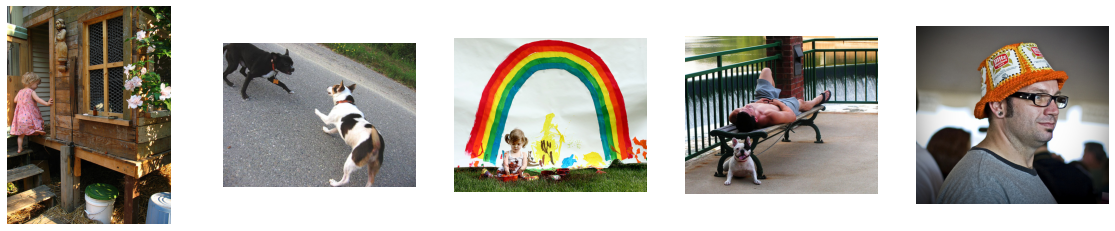

In [5]:
"""
Visualizing the First 5 Images in the Dataset

This code snippet:
1. Extracts the first 5 images from the dataset.
2. Displays them in a single row using Matplotlib with a fixed figure width.

Steps:
- The `all_imgs` list contains the file paths of all images.
- Images are displayed using `imshow()` from Matplotlib.
- `io.imread()` is used to load the image data for display.

"""
# Import the dataset and read the images into a separate variable
import glob



# Use glob to find all .jpg files in the directory
all_images = glob.glob(f"{images_path}/*.jpg", recursive=True)

# Display the total number of images found
print(f"Total images present in the dataset: {len(all_images)}")


# ======================
# Visualize the First 5 Images
# ======================

# Extract the first 5 image paths from the dataset
Display_Images = all_images[0:5]

# Set up a Matplotlib figure with 1 row and 5 columns
figure, axes = plt.subplots(1, 5)  # 1 row, 5 columns
figure.set_figwidth(20)  # Set the figure width for better spacing

# Iterate over each axis and corresponding image path
for ax, image in zip(axes, Display_Images):
    ax.imshow(iio.imread(image), cmap=None)  # Display the image
    ax.axis('off')  # Turn off the axis for cleaner visuals


In [6]:
"""
Load and Display Text from a File

This script defines a function to load the content of a text file and returns the text.
Additionally, it prints the first 300 characters of the loaded text for preview.

Functionality:
1. Open and read a file using Python's built-in `open()` function.
2. Handles encoding issues by specifying `latin-1` encoding.
3. Ensures the file is closed after reading to prevent resource leaks.

"""



# Function to load and read a text file
def load_doc(captions_file):
    """
    Load the content of a text file.

    Args:
    text_file (str): Path to the text file to be loaded.

    Returns:
    str: The content of the file as a string.
    """
    # Open the file in read mode with specified encoding
    open_file = open(captions_file, 'r', encoding="latin-1")

    # Read the content of the file
    text = open_file.read()
    print(text)  # Print the content (optional; can be commented out)

    # Close the file to release resources
    open_file.close()

    return text

# Load the text file and display the first 300 characters
doc = load_doc(captions_file)
print("\nPreview of the file content (first 300 characters):")
print(doc[:300])


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [7]:
"""
Parse Image Captions and Paths from a Dataset

This script processes a captions file to extract:
1. Image IDs
2. Corresponding captions
3. Full image paths

The data is stored in a Pandas DataFrame for further use in training or analysis.

Functionality:
- Reads a CSV-like captions file.
- Extracts the image ID, caption, and constructs full image paths.
- Strips unnecessary characters (e.g., newline, punctuation) from captions.

"""

import pandas as pd  # Importing Pandas for DataFrame creation

# Initialize empty lists to store image metadata and captions
all_img_id = []       # Store all image IDs
all_img_vector = []   # Store all image paths
annotations = []      # Store all captions

# Process the captions file
with open(captions_file, 'r') as fo:
    # Skip the header row
    next(fo)

    # Read each line in the file
    for line in fo:
        # Split the line into image ID and caption
        split_arr = line.split(',')

        # Append image ID
        all_img_id.append(split_arr[0])

        # Append processed caption (remove newline and trailing full stops)
        annotations.append(split_arr[1].rstrip('\n.'))

        # Construct and append full image path
        all_img_vector.append(images_path + split_arr[0])

# Create a DataFrame to organize the extracted data
df = pd.DataFrame(
    list(zip(all_img_id, all_img_vector, annotations)),
    columns=['ID', 'Path', 'Captions']
)

# Display the resulting DataFrame
print("DataFrame with image metadata and captions:")
print("all_img_vector shape :",(len(all_img_vector)))
df



DataFrame with image metadata and captions:
all_img_vector shape : 40455


ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                    Path  \
0      /home/eyeforblind/Images/1000268201_693b08cb0e...   
1      /home/eyeforblind/Images/1000268201_693b08cb0e...   
2      /home/eyeforblind/Images/1000268201_693b08cb0e...   
3      /home/eyeforblind/Images/1000268201_693b08cb0e...   
4      /home/eyeforblind/Images/1000268201_693b08cb0e...   
...                                                  ...   
40450  /home/eyeforblind/Images/997722733_0cb5439472.jpg   
40451  /home/eyeforblind/Images/997722733_0cb5439472.jpg   
40452  /home/eyeforblind/Images/997722733_0cb5439472.jpg   
40453  /home/eyeforblind/Images/997722733_0cb5439472.jpg   
40454  /home/eyeforblind/Images/997722733_0cb5439472.jpg   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                   A girl going into a wooden building   
2        A little girl climbing into a wooden playhouse   
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451            A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock fac...  
40453                     A rock climber in a red shirt   
40454  A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

Top 30 most common words:
a: 60196
in: 18174
the: 17507
on: 10357
is: 9069
and: 8057
dog: 7948
with: 7304
man: 7137
of: 6495
two: 5132
white: 3706
black: 3620
boy: 3514
are: 3365
woman: 3304
girl: 3277
to: 3005
wearing: 2916
people: 2811
at: 2810
water: 2676
young: 2587
red: 2553
brown: 2457
an: 2325
his: 2255
blue: 2125
dogs: 2095
running: 1996


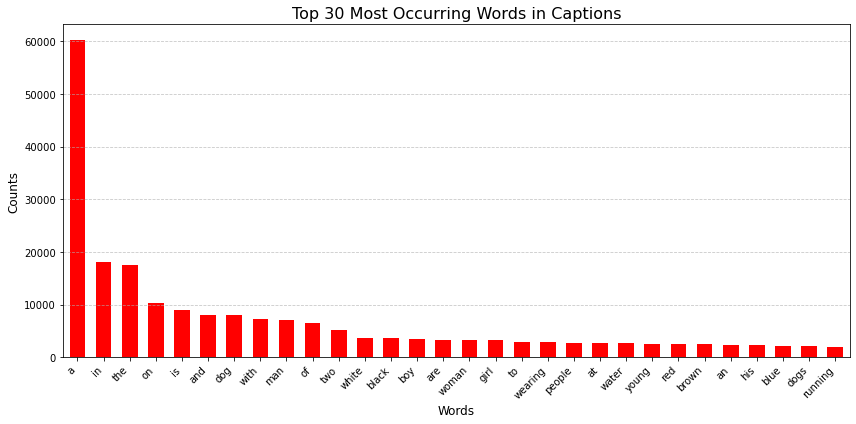

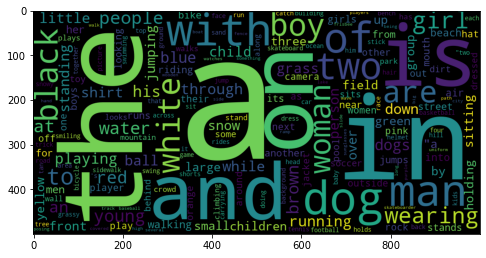

In [8]:

"""
Vocabulary Analysis and Visualization

This script performs the following:
1. Builds a vocabulary of unique words from the captions.
2. Counts the frequency of each word using `collections.Counter`.
3. Displays the 30 most common words with their counts.
4. Visualizes the top 30 most common words in a bar chart.


"""

import collections  # For counting word occurrences
import pandas as pd  # For creating a DataFrame
import matplotlib.pyplot as plt  # For visualization

# ======================
# Vocabulary Creation and Word Count
# ======================

# Build vocabulary: split captions into words, convert to lowercase, and flatten
vocabulary = [word.lower() for line in annotations for word in line.split()]

# Count word frequencies
val_count = collections.Counter(vocabulary)

# Display the top 30 most common words with their counts
print("Top 30 most common words:")
for word, count in val_count.most_common(30):
    print(f"{word}: {count}")

# ======================
# Create DataFrame for Visualization
# ======================

# Extract the top 30 most common words and their counts
lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns=['Word', 'Count'])

# ======================
# Visualization
# ======================

# Plot a bar chart for the top 30 most common words
most_common_words_df.plot.bar(
    x='Word',
    y='Count',
    width=0.6,
    color='red',
    legend=False,
    figsize=(12, 6)  # Set figure size
)

# Customize the plot
plt.title("Top 30 Most Occurring Words in Captions", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for counts

# Show the plot
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


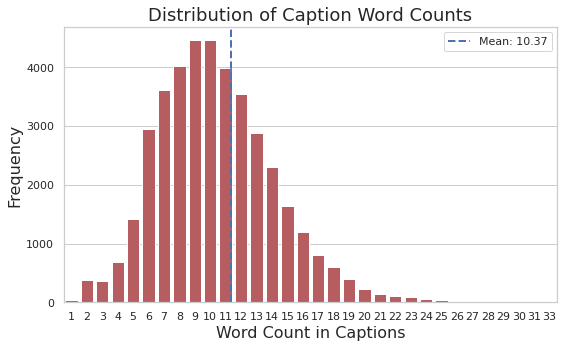

In [9]:
"""
Analyze and Visualize Word Counts in Captions

This script:
1. Creates a new DataFrame column for word counts in captions.
2. Calculates the mean word count of all captions.
3. Visualizes the distribution of word counts using a count plot.
4. Marks the mean word count with a vertical dashed line.

"""

# ======================
# Copy DataFrame and Add Word Count Column
# ======================

# Create a copy of the DataFrame
caption_df = df.copy()

# Add a column for the word count of each caption
caption_df['caption_word_count'] = caption_df["Captions"].str.split().str.len()

# ======================
# Calculate Mean Word Count
# ======================

# Compute the mean word count
mean = sum(caption_df['caption_word_count']) / len(caption_df['caption_word_count'])

# ======================
# Visualization
# ======================

# Set Seaborn style and figure size
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(8, 5))

# Create a count plot for word counts
ax = sns.countplot(caption_df['caption_word_count'], color="r")

# Customize the plot
plt.xlabel('Word Count in Captions', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Caption Word Counts', fontsize=18)

# Add a vertical line for the mean word count
ax.axvline(mean, color='b', linestyle='--', linewidth=2)

# Add a legend for the mean line
plt.legend({'Mean: {:.2f}'.format(mean): mean})

# Show the plot
plt.tight_layout()
plt.show()


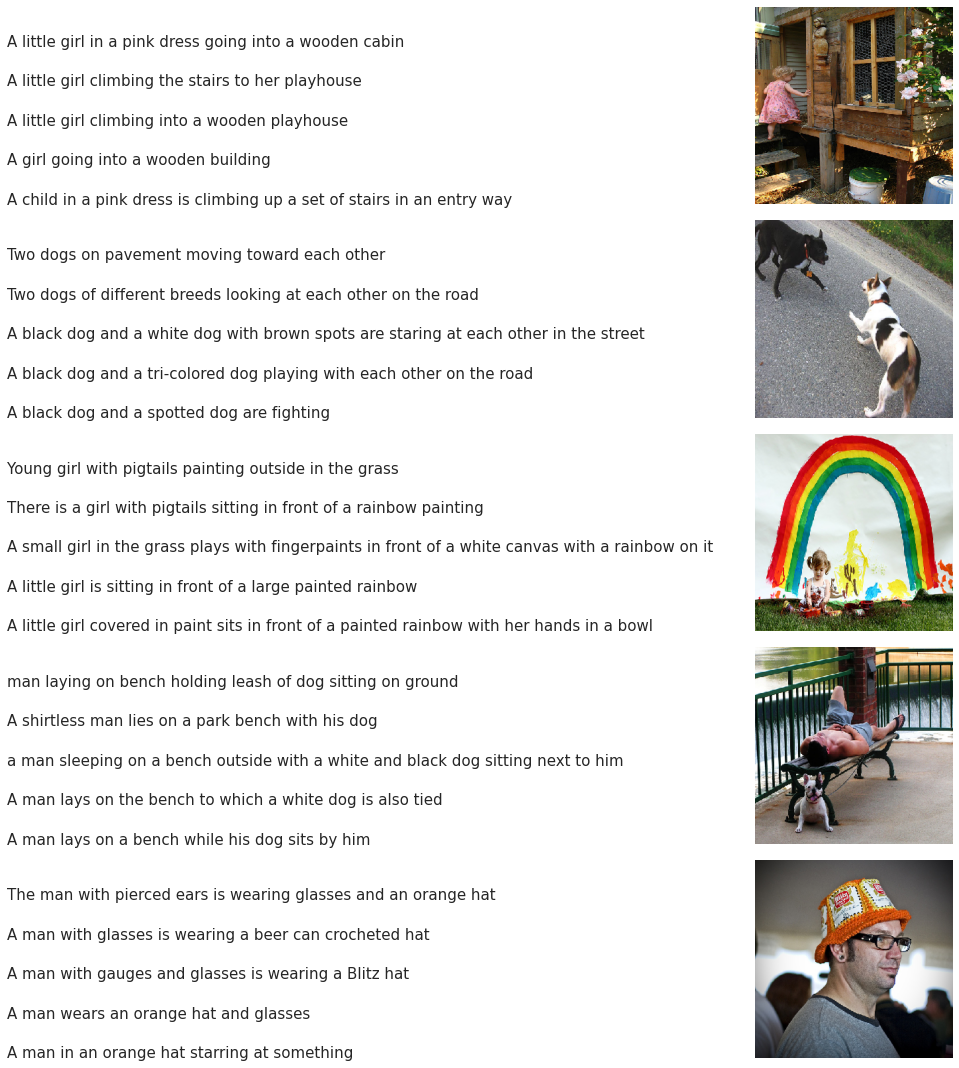

In [10]:
"""
Display Images with Captions in Subplots

This script:
1. Displays the first 25 unique image paths and their captions.
2. Organizes the images and captions into subplots, with each image and its captions shown side by side.
3. Uses Matplotlib to plot images and their respective captions in a grid layout.

"""


# ======================
# Set Up Plot and Variables
# ======================

# Create a figure with a custom size
fig = plt.figure(figsize=(15, 15))

# Initialize counter for subplot indexing
count = 1

# Loop through the first 25 unique image paths
for Path in df[:25].Path.unique():

    # Extract all captions corresponding to the current image path
    captions = list(df["Captions"].loc[df.Path == Path].values)

    # Load the image and resize it to the target size (299x299)
    display_image = load_img(Path, target_size=(299, 299))

    # Create a subplot for displaying the captions (5 rows, 2 columns)
    ax = fig.add_subplot(5, 2, count)  # 5 rows, 2 columns
    plt.axis('off')  # Remove both x and y axes for the caption subplot

    ax.plot()  # Optional: Adds a plot to ensure proper axis setup
    ax.set_xlim(0, 1)  # Set x-axis limits
    ax.set_ylim(0, len(captions))  # Adjust y-axis to space the captions

    # Display each caption in the subplot
    for i, caption in enumerate(captions):
        ax.text(0, i, caption, fontsize=15)  # Display the captions in the subplot

    # Increment counter for the next subplot
    count += 1

    # Adjust layout to avoid overlap between images and captions
    plt.tight_layout()

    # Create a subplot for displaying the image
    ax = fig.add_subplot(5, 2, count)
    ax.imshow(display_image)  # Display the image
    plt.axis('off')  # Remove axes for the image plot

    # Increment counter for the next subplot
    count += 1

# Show the final plot with images and captions
plt.show()


In [11]:
"""
Data Cleaning for Captions

This script:
1. Cleans the captions by:
   - Converting text to lowercase.
   - Removing punctuation.
   - Removing single-character tokens (like "s" or "a").
   - Removing tokens that contain numbers.
2. The cleaned captions are stored back in the `annotations` list.

"""

import string  # For working with string operations

# ======================
# Prepare Translation Table for Removing Punctuation
# ======================

# Translation table to remove punctuation from text
remove_punctuation = str.maketrans('', '', string.punctuation)

# ======================
# Clean Captions
# ======================

# Iterate over each caption in the annotations
for i in range(len(annotations)):

    # Split caption into individual words
    line = annotations[i]
    line = line.split()

    # Convert all words to lowercase
    line = [word.lower() for word in line]

    # Remove punctuation from each word
    line = [word.translate(remove_punctuation) for word in line]

    # Remove words with only a single character (like 's', 'a')
    line = [word for word in line if len(word) > 1]

    # Remove words that contain numbers
    line = [word for word in line if word.isalpha()]

    # Rejoin the words back into a cleaned caption string
    annotations[i] = ' '.join(line)



In [12]:
"""
Create Caption and Image Path Lists

This script:
1. Adds `<start>` and `<end>` tokens to all captions for the captioning task.
2. Creates a list containing paths to all the images.
3. Prints the total number of captions and images in the dataset.

"""

# ======================
# Add <start> and <end> Tokens to Captions
# ======================

# Add '<start>' at the beginning and '<end>' at the end of each caption
annotations = ['<start> ' + line + ' <end>' for line in annotations]

# ======================
# Create a List of Image Paths
# ======================

# Assuming 'all_img_vector' contains the full paths to the images, assign it to 'all_img_path'
all_img_path = all_img_vector

# ======================
# Output the Counts of Captions and Images
# ======================

# Print the total number of captions and images
print("Total captions present in the dataset: " + str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))


Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [13]:
#annotations.dtype
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [14]:
"""
Create Vocabulary and Count Word Occurrences in Captions

This script:
1. Downloads required NLTK resources for tokenization.
2. Tokenizes the captions, converts them to lowercase, and counts word frequencies.
3. Displays the size of the vocabulary and the top 10 most frequent words in the dataset.

"""

import nltk
from collections import Counter

# ======================
# Download Required NLTK Resources
# ======================

# Download necessary resources for tokenization
nltk.download('punkt')  # Tokenizer for splitting sentences into words
nltk.download('punkt_tab')  # Tokenizer for splitting sentences into words

# ======================
# Tokenize Captions and Count Words
# ======================

# Initialize an empty list to store all words from captions
all_words = []

# Iterate through each caption in the annotations list
for caption in annotations:
    # Tokenize the caption into words and convert them to lowercase
    words = nltk.word_tokenize(caption.lower())

    # Add the words to the all_words list
    all_words.extend(words)

# ======================
# Create Vocabulary and Word Frequency Count
# ======================

# Create a vocabulary, which is a set of unique words from all words
vocabulary = set(all_words)

# Count occurrences of each word using Counter
word_counter = Counter(all_words)

# ======================
# Display Results
# ======================

# Display the size of the vocabulary (unique words)
print(f"Vocabulary Size: {len(vocabulary)}")

# Display the top 10 most frequent words and their counts
print(f"Top 10 Most Frequent Words: {word_counter.most_common(10)}")



[nltk_data] Downloading package punkt to /home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Vocabulary Size: 8572
Top 10 Most Frequent Words: [('<', 80910), ('>', 80910), ('end', 40505), ('start', 40464), ('in', 18182), ('the', 17676), ('on', 10367), ('is', 9069), ('and', 8057), ('dog', 7956)]


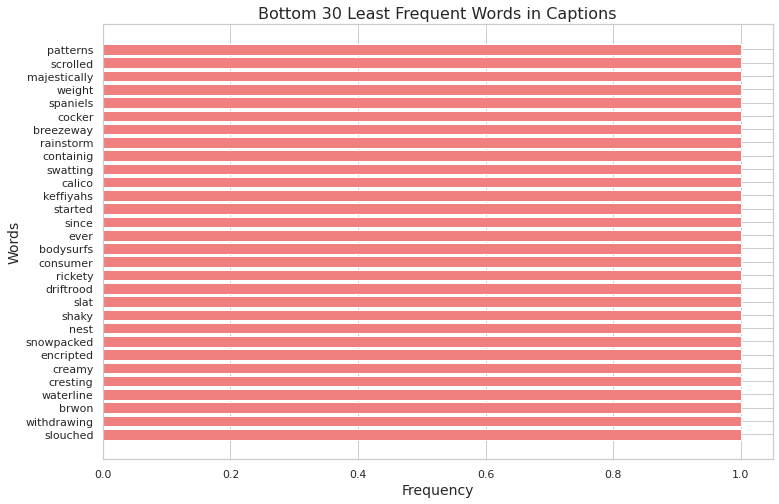

In [15]:
"""
Visualize the Bottom 30 Least Frequent Words in Captions

This script:
1. Identifies the 30 least frequent words in the captions dataset.
2. Sorts the words by their frequency in ascending order.
3. Visualizes the bottom 30 words in a horizontal bar chart.


"""


# ======================
# Get the Bottom 30 Least Frequent Words
# ======================

# Get the bottom 30 least common words using Counter
bottom_30_words = word_counter.most_common()[:-31:-1]

# Sort the words by frequency in ascending order
sorted_bottom_30_words = sorted(bottom_30_words, key=lambda x: x[1])

# ======================
# Extract Words and Counts for Plotting
# ======================

# Extract the words and their counts
words, counts = zip(*sorted_bottom_30_words)

# ======================
# Visualization
# ======================

# Create a horizontal bar chart for the bottom 30 least frequent words
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='lightcoral')

# Customize the plot
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Bottom 30 Least Frequent Words in Captions', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to display the lowest frequencies at the top

# Display the plot
plt.show()


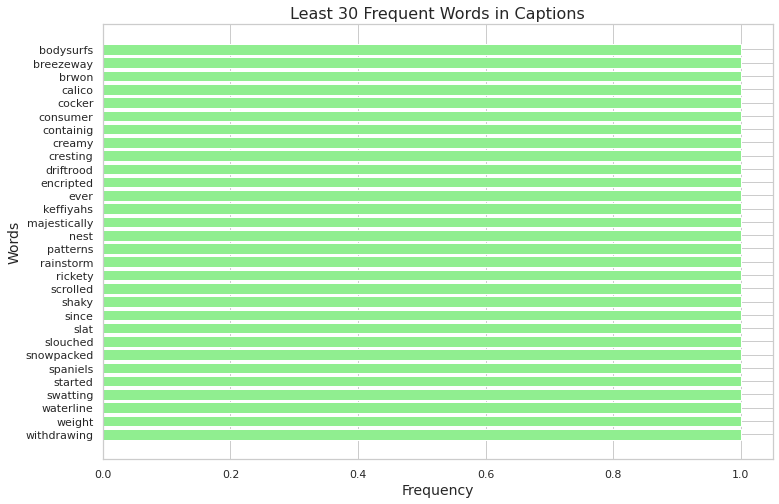

In [16]:
"""
Visualize the Least 30 Occurring Words in Captions

This script:
1. Retrieves the 30 least common words in the captions dataset.
2. Sorts the words alphabetically for consistency.
3. Visualizes these words in a horizontal bar chart, showing their frequencies.

"""

# ======================
# Get the 30 Least Common Words
# ======================

# Get the 30 least common words using the Counter object
least_common_words = word_counter.most_common()[-30:]

# Sort the least common words alphabetically by word for consistent display
sorted_least_common_words = sorted(least_common_words, key=lambda x: x[0])

# ======================
# Extract Words and Counts for Plotting
# ======================

# Extract the words and their counts for the bar chart
words, counts = zip(*sorted_least_common_words)

# ======================
# Visualization
# ======================

# Create a horizontal bar chart for the least common words
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='lightgreen')

# Customize the plot
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Least 30 Frequent Words in Captions', fontsize=16)

# Invert y-axis to display the least frequent words at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters.
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

### Create the tokenizer

- We have already removed numeric character in previous step.
- Let's remove punctuations using filter again for to be sure(The default is all punctuation, plus tabs and line breaks, minus the ' character.)

- Convert words to lower case (this is also already done.Let's do again to be safe)
- And,replace out-of-vocabulary words with UNK token and assign PAD token for reseved zero index

In [17]:

"""
Tokenization of Captions with TensorFlow Keras Tokenizer

This script:
1. Configures a tokenizer with specified parameters (vocabulary size, filters, and special tokens).
2. Fits the tokenizer on the given captions (annotations).
3. Converts the text (captions) into sequences of integer tokens.

"""

import tensorflow as tf

# ======================
# Define the Tokenizer Parameters
# ======================

# Limit the vocabulary to the top 5,000 words
TOP_WORD_COUNT = 5000

# Define the characters to filter out during tokenization (punctuation and special symbols)
FILTER_CHARS = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '  # Exclude these characters from tokenization

# ======================
# Create and Configure the Tokenizer
# ======================

# Initialize the tokenizer with the specified parameters
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=TOP_WORD_COUNT,  # Maximum number of words in the vocabulary
    oov_token="<unk>",         # Token to represent out-of-vocabulary words
    filters=FILTER_CHARS       # Characters to be removed during tokenization
)

# Fit the tokenizer on the provided captions (annotations)
tokenizer.fit_on_texts(annotations)

# ======================
# Convert Text to Sequences
# ======================

# Convert the captions into sequences of integer tokens
train_sequences = tokenizer.texts_to_sequences(annotations)

# ======================
# Output Sample Tokenized Sequences
# ======================

# Print the first 5 tokenized sequences and the original captions for comparison
print("train_sequences shape=",len(train_sequences))
print("Sample tokenized sequences:", train_sequences[:5])
print("Sample original annotations:", annotations[:5])



train_sequences shape= 40455
Sample tokenized sequences: [[2, 43, 4, 88, 169, 7, 115, 52, 390, 12, 382, 4, 28, 1, 687, 3], [2, 19, 309, 63, 193, 119, 3], [2, 37, 19, 115, 63, 193, 2354, 3], [2, 37, 19, 115, 5, 382, 20, 62, 2354, 3], [2, 37, 19, 4, 88, 169, 309, 63, 193, 2889, 3]]
Sample original annotations: ['<start> child in pink dress is climbing up set of stairs in an entry way <end>', '<start> girl going into wooden building <end>', '<start> little girl climbing into wooden playhouse <end>', '<start> little girl climbing the stairs to her playhouse <end>', '<start> little girl in pink dress going into wooden cabin <end>']


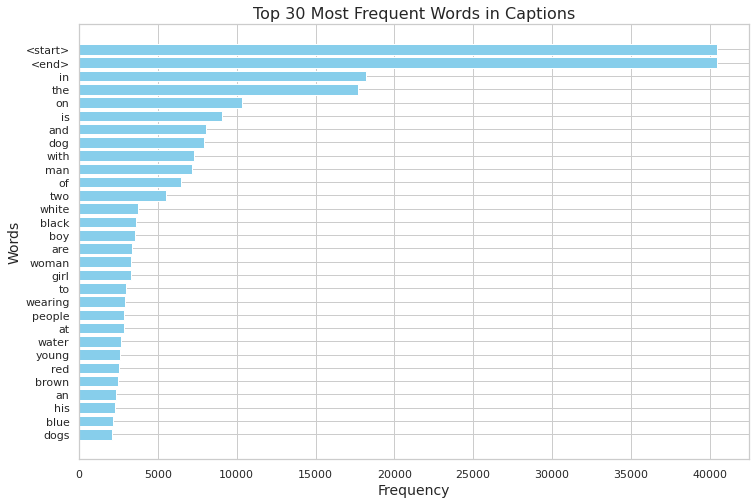

In [18]:
"""
Visualize the Top 30 Most Frequent Words in Captions

This script:
1. Sorts the word frequencies from the tokenizer in descending order.
2. Extracts the top 30 words and their counts.
3. Visualizes the top 30 most frequent words using a horizontal bar chart.

"""


# ======================
# Extract and Sort Word Frequencies
# ======================

# Access the word counts from the tokenizer and sort them by frequency (descending)
sorted_word_counts = sorted(
    tokenizer.word_counts.items(),  # Get word-frequency pairs from the tokenizer
    key=lambda item: item[1],       # Sort by frequency (value in key-value pairs)
    reverse=True                    # Sort in descending order
)

# Extract the words and their counts for the top 30 entries
words, counts = zip(*sorted_word_counts[:30])  # Unpack into separate lists

# ======================
# Visualization
# ======================

# Create a horizontal bar chart for the top 30 words
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(words, counts, color='skyblue')  # Horizontal bar chart with custom color

# Customize the chart
plt.xlabel('Frequency', fontsize=14)  # Label for the x-axis
plt.ylabel('Words', fontsize=14)      # Label for the y-axis
plt.title('Top 30 Most Frequent Words in Captions', fontsize=16)  # Title of the chart
plt.gca().invert_yaxis()              # Invert y-axis for better readability

# Display the chart
plt.show()



In [19]:
"""
Create Word-to-Index and Index-to-Word Mappings

This script:
1. Creates a mapping of words to indices using the top 5,000 most frequent words.
2. Generates a reverse mapping of indices to words for decoding.
3. Outputs a preview of the mappings for verification.

"""

# ======================
# Step 1: Word-to-Index Mapping
# ======================

# Create a dictionary mapping each word to a unique index
# 'top_words' contains the most common words and their counts
word_to_index = {word: index for index, word in enumerate(words)}

# ======================
# Step 2: Index-to-Word Mapping
# ======================

# Create a reverse mapping (index-to-word) for decoding
index_to_word = {index: word for word, index in word_to_index.items()}

# ======================
# Step 3: Output the Mappings
# ======================

# Display the first 10 entries in the Word-to-Index Mapping
print("Word-to-Index Mapping (first 10):")
print(dict(list(word_to_index.items())[:10]))  # Preview the first 10 mappings

# Display the first 10 entries in the Index-to-Word Mapping
print("\nIndex-to-Word Mapping (first 10):")
print(dict(list(index_to_word.items())[:10]))  # Preview the first 10 reverse mappings


Word-to-Index Mapping (first 10):
{'<start>': 0, '<end>': 1, 'in': 2, 'the': 3, 'on': 4, 'is': 5, 'and': 6, 'dog': 7, 'with': 8, 'man': 9}

Index-to-Word Mapping (first 10):
{0: '<start>', 1: '<end>', 2: 'in', 3: 'the', 4: 'on', 5: 'is', 6: 'and', 7: 'dog', 8: 'with', 9: 'man'}


In [20]:
"""
Pad Caption Sequences to Uniform Length

This script:
1. Computes the length of each caption sequence and finds the maximum length.
2. Pads all caption sequences to the length of the longest sequence using TensorFlow's padding utility.
3. Outputs the shape of the resulting caption vector.

"""

import tensorflow as tf

# ======================
# Step 1: Compute Sequence Lengths
# ======================

# Store the lengths of all sequences in a list (can be useful for analysis or debugging)
train_seqs_len = [len(seq) for seq in train_sequences]

# Find the longest sequence length
longest_word_length = max(train_seqs_len)

# ======================
# Step 2: Pad Sequences
# ======================

# Pad all sequences to the length of the longest sequence
# 'padding=post' adds zeros to the end of each sequence
# 'value=0' uses 0 as the padding value
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(
    train_sequences,           # Input sequences
    padding='post',       # Add padding to the end of the sequences
    maxlen=longest_word_length,  # Pad to the length of the longest sequence
    dtype='int32',        # Use 32-bit integer for the sequences
    value=0               # Use 0 as the padding value
)

# ======================
# Step 3: Output Results
# ======================

# Print the shape of the padded caption vector
print(f"The shape of the Caption vector is: {cap_vector.shape}")


The shape of the Caption vector is: (40455, 31)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image.
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [21]:
#write your code here to create the dataset consisting of image paths
"""
Preprocess Images for Model Input

This script:
1. Reads and decodes the first 5 images from a list of image paths.
2. Resizes each image to a fixed shape for uniform input dimensions.
3. Preprocesses the images using InceptionV3's preprocessing utility for compatibility with the model.

"""

import tensorflow as tf

# ======================
# Define Constants
# ======================

# Target image shape for resizing
IMAGE_SHAPE = (299, 299)

# ======================
# Preprocess the First 5 Images
# ======================

# Initialize an empty list to store preprocessed images
preprocessed_img = []

# Loop through the first 5 image paths
for img_path in all_img_vector[:5]:
    # Read the image file
    img = tf.io.read_file(img_path, name=None)

    # Decode the JPEG image file
    # 'channels=0' allows the function to infer the number of channels automatically
    # You can explicitly set 'channels=3' for RGB images
    img = tf.image.decode_jpeg(img, channels=0)

    # Resize the image to the target shape
    img = tf.image.resize(img, IMAGE_SHAPE)

    # Preprocess the image using InceptionV3's preprocessing function
    # This includes scaling pixel values and other transformations
    img = tf.keras.applications.inception_v3.preprocess_input(img, data_format=None)

    # Append the preprocessed image to the list
    preprocessed_img.append(img)

# ======================
# Output Preprocessed Images
# ======================

# Display the number of preprocessed images
print(f"Number of preprocessed images: {len(preprocessed_img)}")

# Display the shape of the first preprocessed image
if preprocessed_img:
    print(f"Shape of the first preprocessed image: {preprocessed_img[0].shape}")


Number of preprocessed images: 5
Shape of the first preprocessed image: (299, 299, 3)


2024-11-26 16:32:56.982108: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
"""
Image Preprocessing Function

This function:
1. Reads and decodes an image from a file path.
2. Resizes the image to a specified target shape.
3. Preprocesses the image using InceptionV3's preprocessing utility for compatibility with the model.


Args:
    image_path (str): Path to the image file to preprocess.

Returns:
    tuple: A tuple containing:
        - The preprocessed image tensor.
        - The original image path for reference.
"""

import tensorflow as tf

# ======================
# Define Constants
# ======================

# Target image shape for resizing
IMAGE_SHAPE = (299, 299)

# ======================
# Preprocess Image Function
# ======================

def preprocess_images_function(image_path):
    """
    Preprocesses a single image given its file path.

    Args:
        image_path (str): Path to the image file to preprocess.

    Returns:
        tuple: A tuple containing:
            - The preprocessed image tensor.
            - The original image path.
    """
    # Read the image file
    img = tf.io.read_file(image_path, name=None)

    # Decode the JPEG image file
    # 'channels=0' infers the number of channels automatically
    img = tf.image.decode_jpeg(img, channels=0)

    # Resize the image to the target shape
    img = tf.image.resize(img, IMAGE_SHAPE)

    # Preprocess the image for InceptionV3
    # This includes scaling pixel values and other transformations
    img = tf.keras.applications.inception_v3.preprocess_input(img, data_format=None)

    # Return the preprocessed image and its original path
    return img, image_path


In [23]:
#write your code here
# mapping each image full path including name to the function to preprocess the image

# sorting and storing unique path in list which will be given as input
training_list = sorted(set(all_img_vector))

# Creating a Dataset using tf.data.Dataset.from_tensor_slice
New_Image_Data = tf.data.Dataset.from_tensor_slices(training_list)


# Mappng preprocess_images_function across the elements of the above dataset.
# num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
New_Image_Data = New_Image_Data.map(preprocess_images_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)


# Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
# We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False
New_Image_Data= New_Image_Data.batch(64,drop_remainder=False)

In [24]:
for preprocessed_image, path in New_Image_Data.take(5):  # Adjust the number to see more samples
    print("Path====",path)
    # Iterate through each path in the batch
    for single_path in path.numpy():
        print("Image Path:", single_path.decode('utf-8'))  # Decode the bytes to string
    print("Preprocessed Image Tensor:", preprocessed_image.numpy())  # Convert the tensor to a numpy array
    print("Preprocessed Image Shape:", preprocessed_image.shape)  # Convert the tensor to a numpy array

Path==== tf.Tensor(
[b'/home/eyeforblind/Images/1000268201_693b08cb0e.jpg'
 b'/home/eyeforblind/Images/1001773457_577c3a7d70.jpg'
 b'/home/eyeforblind/Images/1002674143_1b742ab4b8.jpg'
 b'/home/eyeforblind/Images/1003163366_44323f5815.jpg'
 b'/home/eyeforblind/Images/1007129816_e794419615.jpg'
 b'/home/eyeforblind/Images/1007320043_627395c3d8.jpg'
 b'/home/eyeforblind/Images/1009434119_febe49276a.jpg'
 b'/home/eyeforblind/Images/1012212859_01547e3f17.jpg'
 b'/home/eyeforblind/Images/1015118661_980735411b.jpg'
 b'/home/eyeforblind/Images/1015584366_dfcec3c85a.jpg'
 b'/home/eyeforblind/Images/101654506_8eb26cfb60.jpg'
 b'/home/eyeforblind/Images/101669240_b2d3e7f17b.jpg'
 b'/home/eyeforblind/Images/1016887272_03199f49c4.jpg'
 b'/home/eyeforblind/Images/1019077836_6fc9b15408.jpg'
 b'/home/eyeforblind/Images/1019604187_d087bf9a5f.jpg'
 b'/home/eyeforblind/Images/1020651753_06077ec457.jpg'
 b'/home/eyeforblind/Images/1022454332_6af2c1449a.jpg'
 b'/home/eyeforblind/Images/1022454428_b6b660a6

In [25]:
# Function to preprocess and load an image
def load_image(image_path):
    """
    Preprocess the input image to prepare it for the model.

    Parameters:
        image_path (str): Path to the image file.

    Returns:
        img (Tensor): Preprocessed image tensor.
        image_path (str): Original path of the image.
    """
    # Step 1: Read the image file
    img = tf.io.read_file(image_path)

    # Step 2: Decode the image (assuming JPEG format)
    img = tf.image.decode_jpeg(img, channels=3)

    # Step 3: Resize the image to the required dimensions (299x299)
    img = tf.image.resize(img, [299, 299])

    # Step 4: Preprocess the image using the InceptionV3 preprocess function
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    return img, image_path

In [26]:
# Set batch size for processing the images in batches
BATCH_SIZE = 64
print(all_img_vector)
# Remove duplicates from the list of image paths and sort them
all_img_vector_uniq = sorted(set(all_img_vector))
print(all_img_vector_uniq)
# Create a TensorFlow Dataset from the unique image paths
image_dataset = tf.data.Dataset.from_tensor_slices(all_img_vector_uniq)

# Apply the load_image function, batch the data, and prefetch for optimization
image_dataset = image_dataset.map(
    load_image,  # The function to apply to each image path
    num_parallel_calls=tf.data.experimental.AUTOTUNE  # Automatically determine parallel calls for optimal performance
).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch to improve training performance

# Show a preview of the dataset
image_dataset

print("Unique number of Images:", len(all_img_vector_uniq))


['/home/eyeforblind/Images/1000268201_693b08cb0e.jpg', '/home/eyeforblind/Images/1000268201_693b08cb0e.jpg', '/home/eyeforblind/Images/1000268201_693b08cb0e.jpg', '/home/eyeforblind/Images/1000268201_693b08cb0e.jpg', '/home/eyeforblind/Images/1000268201_693b08cb0e.jpg', '/home/eyeforblind/Images/1001773457_577c3a7d70.jpg', '/home/eyeforblind/Images/1001773457_577c3a7d70.jpg', '/home/eyeforblind/Images/1001773457_577c3a7d70.jpg', '/home/eyeforblind/Images/1001773457_577c3a7d70.jpg', '/home/eyeforblind/Images/1001773457_577c3a7d70.jpg', '/home/eyeforblind/Images/1002674143_1b742ab4b8.jpg', '/home/eyeforblind/Images/1002674143_1b742ab4b8.jpg', '/home/eyeforblind/Images/1002674143_1b742ab4b8.jpg', '/home/eyeforblind/Images/1002674143_1b742ab4b8.jpg', '/home/eyeforblind/Images/1002674143_1b742ab4b8.jpg', '/home/eyeforblind/Images/1003163366_44323f5815.jpg', '/home/eyeforblind/Images/1003163366_44323f5815.jpg', '/home/eyeforblind/Images/1003163366_44323f5815.jpg', '/home/eyeforblind/Images/1

In [27]:
'''
# Fetch a sample batch of images and captions
sample_img_batch, sample_cap_batch = next(iter(image_dataset))

# Print the shapes of the image and caption batches
print("Image batch shape:", sample_img_batch.shape)  # Expected shape: (BATCH_SIZE, 299, 299, 3)
print("Caption batch shape:", sample_cap_batch.shape)  # Expected shape: (BATCH_SIZE, ) since captions are strings
'''

'\n# Fetch a sample batch of images and captions\nsample_img_batch, sample_cap_batch = next(iter(image_dataset))\n\n# Print the shapes of the image and caption batches\nprint("Image batch shape:", sample_img_batch.shape)  # Expected shape: (BATCH_SIZE, 299, 299, 3)\nprint("Caption batch shape:", sample_cap_batch.shape)  # Expected shape: (BATCH_SIZE, ) since captions are strings\n'

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048.

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [28]:
# Load the InceptionV3 model pre-trained on ImageNet, excluding the top classification layers
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

# Define the input to the model and the last convolutional layer as the output
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

# Create a new model that outputs the features from the hidden layer (last layer of InceptionV3)
image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=hidden_layer)

# Summary of the feature extraction model
image_features_extract_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [29]:
gc.collect()


739

In [30]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [31]:
import tensorflow as tf
print("GPUs Available:", tf.config.list_physical_devices('GPU'))
print("TensorFlow Version:", tf.__version__)

GPUs Available: []
TensorFlow Version: 2.13.1


In [32]:
#image_dataset.head()
# write your code to extract features from each image in the dataset
image_features_dict={}
for image, image_path in tqdm(New_Image_Data): #using tqdm as progress bar
    features_for_batch = image_features_extract_model(image) #feeding images from above created dataset to Inception v3 which we build above
    #fb_shape = features_for_batch.get_shape().as_list()
    #features_for_batch_flattened = tf.contrib.layers.flatten(fb_shape)
    features_for_batch_flattened = tf.reshape(features_for_batch,
                             (features_for_batch.shape[0], -1, features_for_batch.shape[3])) ##We are sqeezing/squashing

    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()

100%|██████████| 127/127 [07:49<00:00,  3.70s/it]


In [33]:
features_for_batch

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.74670988e-02, 0.00000000e+00, ...,
          2.31838271e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07788220e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94035411e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85754240e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.42659378e-02, 0.00000000e+00, 5.05789816e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.23009664e-01, 1.34443045e-02, ...,
          2.33670294e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [34]:
len(image_features_dict)

8091

In [35]:
'''
# Dictionary to hold the features (optional, not used directly here)
image_dict = {}

# Directory where you want to save the features
feature_save_path = '/content/drive/MyDrive/ColabNotebooks/CapstonProj_EyeForBlind/maps/'

# Iterate through the image dataset to extract and save features
for img, path in tqdm(image_dataset):
    # Extract features from the batch of images
    batch_features = image_features_extract_model(img)
    print("Feature batch shape:", batch_features.shape)

    # Reshape the features from (batch_size, height, width, channels) to (batch_size, num_features)
    batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

    # Iterate through each image feature in the batch
    for bf, p in zip(batch_features, path):
        # Decode the path from TensorFlow tensor to a string
        path_of_feature = p.numpy().decode("utf-8")

        # Get the file name from the path (without the directory part)
        path_of_feature1 = os.path.basename(path_of_feature)

        # Construct the full path where the feature will be saved
        path_of_feature2 = os.path.join(feature_save_path, path_of_feature1)

        # Save the extracted features to a .npy file
        np.save(path_of_feature2, bf.numpy())

# Optionally print out a sample saved path
print(f"Features saved to: {path_of_feature2}")
'''

'\n# Dictionary to hold the features (optional, not used directly here)\nimage_dict = {}\n\n# Directory where you want to save the features\nfeature_save_path = \'/content/drive/MyDrive/ColabNotebooks/CapstonProj_EyeForBlind/maps/\'\n\n# Iterate through the image dataset to extract and save features\nfor img, path in tqdm(image_dataset):\n    # Extract features from the batch of images\n    batch_features = image_features_extract_model(img)\n    print("Feature batch shape:", batch_features.shape)\n\n    # Reshape the features from (batch_size, height, width, channels) to (batch_size, num_features)\n    batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))\n\n    # Iterate through each image feature in the batch\n    for bf, p in zip(batch_features, path):\n        # Decode the path from TensorFlow tensor to a string\n        path_of_feature = p.numpy().decode("utf-8")\n\n        # Get the file name from the path (without the directory part)

In [36]:
!pip install more_itertools

  Using cached more_itertools-10.5.0-py3-none-any.whl (60 kB)


In [37]:
import more_itertools
top_5_items = more_itertools.take(5, image_features_dict.items())

top_5_items #printing first 5 elememts have dictionary

[('/home/eyeforblind/Images/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16987178],
         [0.        , 0.        , 1.0105908 , ..., 0.        , 0.        ,
          0.06111793],
         ...,
         [0.        , 0.        , 2.0380445 , ..., 1.2029643 , 0.        ,
          1.9924111 ],
         [0.        , 0.        , 0.9046898 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2527324 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/home/eyeforblind/Images/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6636795 , 0.46285763, ..., 0.        , 0.        ,
          3.3322644 ],
         [0.        , 1.2268145 , 0.        , ..., 0.        , 0.25390154,
          3.3295343 ],
         [1.2882012 , 1.519538  , 0.        , ..., 0.4677789 , 0.3647444

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature.

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [38]:
# Code for test train split
path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)



In [39]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[   2   13   27   31  500    6    5 1681  170    3    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
<start> two brown dogs fight on the leafy ground <end>


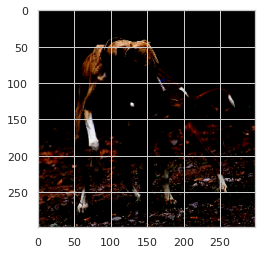

In [40]:
print(cap_test[1])
print(" ".join(tokenizer.index_word.get(i, '') for i in cap_test[1] if i in tokenizer.index_word)) # Filter out keys not in the dictionary
plt.imshow(load_image(path_test[1])[0])

In [41]:
# Function that maps the image path to its features and the respective caption
def map_func(image, caption):
    """
    This function loads the pre-saved image features from the .npy file
    and returns the features along with the corresponding caption.

    Parameters:
    - image (Tensor): Tensor containing the image path.
    - caption (str): The caption corresponding to the image.

    Returns:
    - img_tensor (ndarray): The preprocessed image features as a numpy array.
    - caption (str): The caption associated with the image.
    """

    # Get the image filename from the path tensor (image is expected as a tensor of bytes)
    img_name_temp = os.path.basename(image.numpy().decode('utf-8'))

    # Construct the path where the image features are stored (should be .npy)
    img_name_ip = '/content/drive/MyDrive/ColabNotebooks/CapstonProj_EyeForBlind/maps/' + img_name_temp

    # Load the image features from the .npy file
    img_tensor = np.load(img_name_ip + '.npy')

    # Return the image features (tensor) and the caption
    return img_tensor, caption


### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [42]:
#we need to give both images and caption to model as input
def model_input(image,captions):
    image_final = image_features_dict[image.decode('utf-8')]
    return image_final,captions

In [43]:
"""
Dataset Preparation Using TensorFlow's tf.data API

This script:
1. Prepares a dataset using image and caption data.
2. Applies shuffling, batching, and prefetching for efficient input pipeline.
3. Uses dynamic parallel calls for mapping data processing to available CPU resources.


Args:
    images_data (list or np.array): Array or list of preprocessed image data.
    captions_data (list or np.array): Array or list of tokenized captions corresponding to the images.

Returns:
    tf.data.Dataset: A TensorFlow dataset object ready for training.
"""

import tensorflow as tf

# ======================
# Constants
# ======================

# Buffer size for shuffling
BUFFER_SIZE = 1000

# Batch size for training
BATCH_SIZE = 64  # Chosen to optimize memory usage and avoid kernel crashes

# ======================
# Data Generator Function
# ======================

def data_generator(images_data, captions_data):
    """
    Prepares a TensorFlow dataset from image and caption data.

    The dataset is shuffled, batched, and preprocessed for efficient training.

    Args:
        images_data (list or np.array): Preprocessed image data.
        captions_data (list or np.array): Tokenized caption data.

    Returns:
        tf.data.Dataset: A dataset ready for input to the model.
    """
    # Create a dataset from tensors
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # Apply the mapping function using tf.numpy_function to preprocess each element
    dataset = dataset.map(
        lambda item1, item2: tf.numpy_function(
            model_input, [item1, item2], [tf.float32, tf.int32]
        ),
        num_parallel_calls=tf.data.AUTOTUNE  # Dynamically adjusts based on available CPU
    )

    # Shuffle, batch, and prefetch the dataset
    dataset = (
        dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True)  # Shuffle with buffer size
        .batch(BATCH_SIZE, drop_remainder=False)  # Create batches, don't drop the last smaller batch
        .prefetch(tf.data.AUTOTUNE)  # Prefetch to overlap data preprocessing and training
    )

    return dataset



In [44]:
# Create the training dataset
train_dataset = data_generator(path_train, cap_train)

# Create the testing dataset
test_dataset = data_generator(path_test, cap_test)
img_test=path_test.copy()

In [45]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>

In [46]:
# Take a sample batch from the training dataset
sample_img_batch, sample_cap_batch = next(iter(train_dataset))

# Inspect the shape of the image batch and caption batch
print("Shape of sample image batch:", sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print("Shape of sample caption batch:", sample_cap_batch.shape)  #(batch_size, max_len)


Shape of sample image batch: (64, 64, 2048)
Shape of sample caption batch: (64, 31)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [47]:
"""
Define Model Parameters and Data Constants

This script:
1. Sets key parameters for the embedding size, LSTM/GRU units, and vocabulary size.
2. Calculates the number of training and testing steps based on the dataset size and batch size.
3. Defines input feature shapes and the maximum caption length.

Author: [Your Name]
Date: [Today's Date]
"""

# ======================
# Model and Dataset Parameters
# ======================

# Dimension of the embedding space for word representations
embedding_dim = 256

# Number of units in the RNN (e.g., GRU or LSTM)
units = 512

# Vocabulary size, including an additional token for out-of-vocabulary (<unk>) or padding
vocab_size = 5001  # Top 5,000 words + 1 special token

# ======================
# Training and Testing Steps
# ======================

# Number of training steps per epoch (total images in training set divided by batch size)
train_num_steps = len(path_train) // BATCH_SIZE

# Number of testing steps per epoch (total images in testing set divided by batch size)
test_num_steps = len(path_test) // BATCH_SIZE

# ======================
# Caption and Feature Shapes
# ======================

# Maximum length of captions (adjust based on your data; 31 is a common default)
max_length = 31

# Feature dimensions from the CNN (e.g., InceptionV3, ResNet)
features_shape = batch_feat.shape[1]  # Dimensionality of extracted features per image

# Number of attention features (e.g., spatial regions of interest in the image)
attention_features_shape = batch_feat.shape[0]  # Number of features for attention mechanism


### Encoder

In [48]:
"""
Encoder Class for Image Captioning Model

The Encoder class processes image features extracted from a CNN model (e.g., InceptionV3 ).
It applies a dense layer to transform the features into a suitable embedding space for the decoder.

Features:
1. Dense layer with ReLU activation to project features into the embedding space.
2. Input features are transformed to a shape compatible with the attention mechanism.

"""

import tensorflow as tf
from tensorflow.keras import Model

# ======================
# Encoder Class
# ======================

class Encoder(Model):
    """
    Encoder for processing image features.

    Args:
        embed_dim (int): Dimensionality of the embedding space.

    Methods:
        call(features): Processes the input features through a dense layer and ReLU activation.
    """

    def __init__(self, embed_dim):
        """
        Initialize the Encoder.

        Args:
            embed_dim (int): Dimensionality of the embedding space.
        """
        super(Encoder, self).__init__()

        # Dense layer to transform image features
        self.dense = tf.keras.layers.Dense(embed_dim)
        self.batch_norm = tf.keras.layers.BatchNormalization()  # Batch normalization layer
        self.dropout = tf.keras.layers.Dropout(0.3)  # Dropout for regularization

    def call(self, features):
        """
        Forward pass to process image features.

        Args:
            features (tensor): Extracted image features of shape (batch_size, num_regions, feature_dim).

        Returns:
            tensor: Transformed features of shape (batch_size, num_regions, embed_dim).
        """
        # Apply the dense layer
        features = self.dense(features)

        # Apply ReLU activation
        features = self.batch_norm(features)  # Apply BatchNormalizatio
        features = tf.keras.activations.relu(features) # Apply ReLU activation
        features = self.dropout(features) # Apply Dropout

        return features



In [49]:
encoder=Encoder(embedding_dim)

### Attention model

In [50]:
"""
Attention Model for Image Captioning

The Attention model calculates the context vector and attention weights, focusing on relevant parts of the image features.
It uses additive attention to combine the hidden state of the decoder with image features.

Features:
1. Three Dense layers (`W1`, `W2`, `V`) to compute the attention mechanism.
2. Outputs the context vector and attention weights for the decoder.

Args:
    units (int): Number of units for the attention mechanism.

Methods:
    call(features, hidden): Computes the context vector and attention weights.

Returns:
    tuple: Context vector and attention weights.
"""

import tensorflow as tf
from tensorflow.keras import Model

# ======================
# Attention Model Class
# ======================

class Attention_model(Model):
    """
    Implements the additive attention mechanism for image captioning.

    Args:
        units (int): Dimensionality of the dense layers used in the attention mechanism.
    """

    def __init__(self, units):
        """
        Initialize the Attention model.

        Args:
            units (int): Number of units for the attention mechanism.
        """
        super(Attention_model, self).__init__()

        # Dense layer for the image features
        self.W1 = tf.keras.layers.Dense(units)

        # Dense layer for the hidden state
        self.W2 = tf.keras.layers.Dense(units)

        # Dense layer to compute the final attention scores
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        """
        Forward pass to compute the attention mechanism.

        Args:
            features (tensor): Image features of shape (batch_size, num_regions, embedding_dim).
            hidden (tensor): Decoder hidden state of shape (batch_size, hidden_size).

        Returns:
            tuple:
                - context_vector (tensor): Weighted sum of image features, shape (batch_size, embedding_dim).
                - attention_weights (tensor): Attention weights for each region, shape (batch_size, num_regions, 1).
        """
        # Expand the hidden state to align with the time dimension of features
        hidden_with_time_axis = hidden[:, tf.newaxis]  # Shape: (batch_size, 1, hidden_size)

        # Compute the score (batch_size, num_regions, units)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

        # Compute the attention weights (batch_size, num_regions, 1)
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1)

        # Compute the context vector as the weighted sum of features (batch_size, embedding_dim)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)  # Reduce across regions

        return context_vector, attention_weights



### Decoder

In [51]:
"""
Decoder Class for Image Captioning with Attention Mechanism

This Decoder class takes in image features, the previous word as input, and the hidden state from the previous time step.
It computes the context vector using the attention mechanism, processes the input through an embedding layer,
and passes it through an RNN (GRU) followed by Dense layers to predict the next word in the caption.

Features:
1. Attention mechanism to focus on important parts of the image.
2. Embedding layer to convert word indices into dense vectors.
3. GRU (Gated Recurrent Unit) for sequential modeling of captions.
4. Dense layers to output the predicted word probabilities.

Author: [Your Name]
Date: [Today's Date]

Args:
    embed_dim (int): Dimension of the embedding space.
    units (int): Number of units in the GRU layer.
    vocab_size (int): Size of the vocabulary.

Methods:
    call(x, features, hidden): Computes the context vector, passes through embedding, GRU, and Dense layers to predict next word.
    init_state(batch_size): Initializes the hidden state for the GRU.
"""

import tensorflow as tf
from tensorflow.keras import Model

class Decoder(Model):
    """
    Decoder with Attention for image captioning.

    Args:
        embed_dim (int): Dimension of the embedding space.
        units (int): Number of units in the GRU layer.
        vocab_size (int): Size of the vocabulary.
    """

    def __init__(self, embed_dim, units, vocab_size):
        """
        Initialize the Decoder with Attention.

        Args:
            embed_dim (int): Dimension of the embedding space.
            units (int): Number of units in the GRU layer.
            vocab_size (int): Size of the vocabulary.
        """
        super(Decoder, self).__init__()
        self.units = units

        # Initialize the Attention model
        self.attention = Attention_model(self.units)

        # Embedding layer to convert words to embeddings
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)

        # GRU layer for sequential data processing
        self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')

        # Dense layers to predict the next word
        self.d1 = tf.keras.layers.Dense(self.units)
        self.d2 = tf.keras.layers.Dense(vocab_size)

    def call(self, x, features, hidden):
        """
        Forward pass through the Decoder.

        Args:
            x (tensor): Input word indices of shape (batch_size, 1).
            features (tensor): Image features of shape (batch_size, num_regions, embedding_dim).
            hidden (tensor): Hidden state from the previous time step of shape (batch_size, units).

        Returns:
            tuple: (output, state, attention_weights)
                - output (tensor): Predicted word logits of shape (batch_size * max_length, vocab_size).
                - state (tensor): Updated hidden state of shape (batch_size, units).
                - attention_weights (tensor): Attention weights for each region of shape (batch_size, num_regions, 1).
        """
        # Get context vector and attention weights from Attention model
        context_vector, attention_weights = self.attention(features, hidden)

        # Embed the input word (x)
        embed = self.embed(x)  # Shape: (batch_size, 1, embedding_dim)

        # Concatenate the context vector with the embedded input
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)  # Shape: (batch_size, 1, embedding_dim + embedding_dim)

        # Pass the concatenated vector through the GRU layer
        output, state = self.gru(embed)  # output shape: (batch_size, 1, hidden_size)

        # Pass through Dense layers
        output = self.d1(output)

        # Reshape the output to prepare it for softmax
        output = tf.reshape(output, (-1, output.shape[2]))  # Shape: (batch_size * max_length, hidden_size)

        # Final Dense layer to output logits for each word in the vocabulary
        output = self.d2(output)  # Shape: (batch_size * max_length, vocab_size)

        return output, state, attention_weights

    def init_state(self, batch_size):
        """
        Initialize the hidden state for the GRU layer.

        Args:
            batch_size (int): Size of the batch.

        Returns:
            tensor: A tensor of zeros with shape (batch_size, units).
        """
        return tf.zeros((batch_size, self.units))


In [52]:
# Instantiate the Decoder with the given parameters
decoder = Decoder(embedding_dim, units, vocab_size)


In [53]:
"""
Step-by-Step Execution of the Encoder-Decoder Process for Image Captioning

This script demonstrates how to pass image features through the Encoder and Decoder,
perform attention-based processing, and generate the predicted captions.

"""

# ==============================
# Encoder and Decoder Steps
# ==============================
print(sample_img_batch.shape)
# 1. Pass the image batch through the Encoder to extract features.
features = encoder(sample_img_batch)  # Extract features from image batch

# 2. Initialize the hidden state for the Decoder (GRU layer).
hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])

# 3. Prepare the decoder input (embedding the <start> token for each caption).
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

# 4. Pass the input, features, and initial hidden state through the Decoder.
# The Decoder will output predictions, updated hidden state, and attention weights.
predictions, hidden_out, attention_weights = decoder(dec_input, features, hidden)

# ==============================
# Output Shapes and Debugging
# ==============================

# Print the shapes of the results to confirm dimensions
print('Feature shape from Encoder: {}'.format(features.shape))  # Expected: (batch, 8*8, embed_dim)
print('Predictions shape from Decoder: {}'.format(predictions.shape))  # Expected: (batch, vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape))  # Expected: (batch, 8*8, 1)


(64, 64, 2048)
Feature shape from Encoder: (64, 64, 256)
Predictions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [54]:
# Define the optimizer using Adam
optimizer = tf.keras.optimizers.Adam()

# Define the loss function using SparseCategoricalCrossentropy
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')


In [55]:
"""
Loss Function with Masking for Sequence-to-Sequence Models

This loss function is used for training sequence-to-sequence models, where padding tokens (zero values) should
not contribute to the loss computation. We use a mask to ignore the zero-padded tokens while calculating the loss.

Features:
1. Masks out padding tokens (zeros) in the captions.
2. Computes the loss only on the valid tokens in the sequence (i.e., non-zero tokens).
3. Uses the `loss_object` to compute the standard loss (e.g., sparse categorical cross-entropy).

"""

import tensorflow as tf

# ==========================
# Loss Function with Masking
# ==========================

def loss_function(real, pred):
    """
    Computes the loss for the sequence-to-sequence model with masking to ignore zero-padded tokens.

    Args:
        real (tensor): The ground truth sequence, shape (batch_size, max_length).
        pred (tensor): The predicted sequence, shape (batch_size, max_length, vocab_size).

    Returns:
        tensor: The mean loss for the batch after masking padding tokens.
    """
    # Step 1: Create a mask to identify non-zero values in the ground truth
    mask = tf.math.logical_not(tf.math.equal(real, 0))  # Mask zeros (padding tokens)

    # Step 2: Compute the loss using the loss_object (e.g., sparse categorical cross-entropy)
    loss_ = loss_object(real, pred)

    # Step 3: Apply the mask to the loss to exclude the padding tokens (zeros)
    mask = tf.cast(mask, dtype=loss_.dtype)  # Cast mask to the same type as the loss
    loss_ *= mask  # Multiply the loss by the mask to ignore zeros (padding)

    # Step 4: Compute the mean loss across the batch
    return tf.reduce_mean(loss_)


In [56]:
"""
Checkpoint Management for Model Saving and Restoration

This script defines the checkpoint path and manages saving and restoring model weights
during training. It also includes functionality to periodically save checkpoints and
restore from the latest checkpoint if available.


"""

import tensorflow as tf

# ==========================
# Checkpoint Path and Initialization
# ==========================

# Define the checkpoint directory where model checkpoints will be stored
checkpoint_path = "/content/drive/MyDrive/ColabNotebooks/CapstonProj_EyeForBlind/checkpoints"

# Initialize the checkpoint object that will store model variables (encoder, decoder, optimizer)
ckpt = tf.train.Checkpoint(
    encoder=encoder,  # The encoder model
    decoder=decoder,  # The decoder model
    optimizer=optimizer  # The optimizer used for training
)

# Initialize a checkpoint manager to manage the saving and restoring of checkpoints
ckpt_manager = tf.train.CheckpointManager(
    ckpt,
    checkpoint_path,  # Directory to store checkpoints
    max_to_keep=5  # Keep the latest 5 checkpoints
)

# ==========================
# Restoring from the Latest Checkpoint (Optional)
# ==========================
'''
# Check if a checkpoint exists, and if so, restore the model state from it
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)  # Restore the checkpoint from the manager
    print("Checkpoint restored from {}".format(ckpt_manager.latest_checkpoint))
else:
    print("No checkpoint found, starting from scratch.")
'''

# ==========================
# Saving Checkpoints Periodically (Optional)
# ==========================
'''
# Define the frequency at which checkpoints are saved (e.g., every 100 steps)
save_frequency = 100  # Save a checkpoint every 100 training steps (can be adjusted)

# Example training loop: save checkpoints periodically
for step in range(train_num_steps):
    # Training loop here (forward pass, loss calculation, backpropagation, etc.)

    # Periodically save the checkpoint at the defined frequency
    if step % save_frequency == 0:
        ckpt_manager.save()  # Save the current checkpoint
        print("Checkpoint saved at step", step)
'''


'\n# Define the frequency at which checkpoints are saved (e.g., every 100 steps)\nsave_frequency = 100  # Save a checkpoint every 100 training steps (can be adjusted)\n\n# Example training loop: save checkpoints periodically\nfor step in range(train_num_steps):\n    # Training loop here (forward pass, loss calculation, backpropagation, etc.)\n\n    # Periodically save the checkpoint at the defined frequency\n    if step % save_frequency == 0:\n        ckpt_manager.save()  # Save the current checkpoint\n        print("Checkpoint saved at step", step)\n'

In [57]:
"""
Resume Training from Latest Checkpoint

This code snippet allows resuming training from the latest checkpoint.
The epoch number is extracted from the checkpoint filename to start training from the correct epoch.

Features:
1. Checks if a checkpoint exists.
2. If a checkpoint is found, extracts the epoch number from the checkpoint filename.
3. Initializes `start_epoch` to the extracted epoch number, allowing the training loop to resume from that point.

"""

# Initialize start_epoch to 0 (start from scratch if no checkpoint exists)
start_epoch = 0

# Check if a checkpoint exists, and if so, extract the epoch number
if ckpt_manager.latest_checkpoint:
    # Extract the epoch number from the checkpoint filename (assuming the filename contains the epoch number)
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])  # Example: "ckpt-10" -> 10

    print(f"Resuming training from epoch {start_epoch}")
else:
    print("No checkpoint found, starting training from scratch.")



No checkpoint found, starting training from scratch.


* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [68]:
# Updated function to handle the channel dimension correctly
def augment_batch(image_batch):
    """
    Applies data augmentation to a batch of images.
    Ensures the correct shape before and after augmentation.
    Args:
        image_batch (tensor): Batch of images (expected shape [batch_size, 64, 2048]).
    Returns:
        tensor: Augmented images with shape [batch_size, 64, 2048].
    """
    # Add the channel dimension if missing
    if len(image_batch.shape) == 3:  # Shape [batch_size, 64, 2048]
        image_batch = tf.expand_dims(image_batch, axis=-1)  # Shape [batch_size, 64, 2048, 1]

    # Apply augmentation
    augmented_batch = data_augmentation(image_batch)

    # Remove the channel dimension after augmentation
    augmented_batch = tf.squeeze(augmented_batch, axis=-1)  # Shape [batch_size, 64, 2048]

    return augmented_batch

# Updated train_step function
#@tf.function
def train_step(img_tensor, target):
    """
    Performs one training step for image captioning using teacher forcing.
    Args:
        img_tensor (tensor): Batch of image tensors with shape (batch_size, height, width).
        target (tensor): Batch of target caption sequences with shape (batch_size, max_length).
    Returns:
        tuple: (total_loss, avg_loss)
    """
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    #print("Inside train step")
    with tf.GradientTape() as tape:
        # Apply augmentation and ensure correct shape
        #print(f"Before augmentation: {img_tensor.shape}")
        img_tensor = augment_batch(img_tensor)
        #print(f"After augmentation: {img_tensor.shape}")

        # Pass the augmented tensor through the encoder
        encoder_output = encoder(img_tensor)
        #print(f"Output shape from encoder: {encoder_output.shape}")

        # Use teacher forcing for the decoder
        for t in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)
            loss += loss_function(target[:, t], predictions)
            dec_input = tf.expand_dims(target[:, t], 1)

    avg_loss = loss / int(target.shape[1])
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, avg_loss


In [69]:
"""
Test Step with Teacher Forcing for Sequence-to-Sequence Model

This function performs a single evaluation step for the image captioning task. Similar to the training step,
it uses **Teacher Forcing**, where the actual target word from the target sequence is used as the input to the decoder
during the next time step.

This function computes the loss over the target sequence and returns the total loss and the average loss for the batch.

Author: [Your Name]
Date: [Today's Date]
"""

import tensorflow as tf

# ============================
# Test Step with Teacher Forcing
# ============================

@tf.function
def test_step(img_tensor, target):
    """
    Performs one evaluation step for image captioning using the teacher forcing technique.

    Args:
        img_tensor (tensor): The batch of image tensors with shape (batch_size, height, width, channels).
        target (tensor): The batch of target caption sequences, with shape (batch_size, max_length).

    Returns:
        tuple: (total_loss, avg_loss)
            - total_loss (tensor): Total loss computed over the batch.
            - avg_loss (tensor): Average loss for the batch.
    """
    # Initialize loss variable
    loss = 0

    # Initialize the hidden state of the decoder
    hidden = decoder.init_state(batch_size=target.shape[0])

    # Decoder input is the <start> token for all captions at the first time step
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    # Record the operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Get image features from the encoder
        encoder_output = encoder(img_tensor)

        # Using teacher forcing: pass the true target word (from the target sequence) as the next input to the decoder
        for t in range(1, target.shape[1]):
            # Pass encoder output and hidden state to the decoder
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

            # Compute loss for the current time step
            loss += loss_function(target[:, t], predictions)

            # Use teacher forcing: the true word is used as the next input to the decoder
            dec_input = tf.expand_dims(target[:, t], 1)

    # Calculate average loss for the batch
    avg_loss = (loss / int(target.shape[1]))

    # Get all trainable variables from encoder and decoder
    tot_trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    # Compute gradients of the loss with respect to trainable variables
    grads = tape.gradient(loss, tot_trainable_variables)

    # Apply gradients using the optimizer
    optimizer.apply_gradients(zip(grads, tot_trainable_variables))

    return loss, avg_loss



In [70]:
"""
Compute the Average Test Loss for the Model

This function calculates the average loss on the test dataset by iterating over the batches in the test set.
It uses the `test_step` function to compute the loss for each batch and accumulates the total loss.
At the end of the loop, the function returns the average test loss over all batches.

"""

import tensorflow as tf

# ==========================
# Test Loss Calculation Function
# ==========================

def test_loss_cal(test_dataset):
    """
    Computes the average loss for the test dataset by iterating through the dataset and computing the loss for each batch.

    Args:
        test_dataset (tf.data.Dataset): The dataset to evaluate, containing image tensors and corresponding target captions.

    Returns:
        avg_test_loss (tensor): The average loss over the entire test dataset.
    """
    total_loss = 0

    # Iterate over the test dataset in batches
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        # Calculate the loss for the current batch using the test_step function
        batch_loss, t_loss = test_step(img_tensor, target)

        # Accumulate the total loss over all batches
        total_loss += t_loss

    # Calculate the average loss by dividing the total loss by the number of steps
    avg_test_loss = total_loss / test_num_steps

    return avg_test_loss


In [71]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast

# Define data augmentation (fix shape handling here if necessary)
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.1)
])

In [ ]:
"""
Training and Evaluation Loop with Checkpoint Saving

This script defines the training loop for the model, where the training loss and test loss are computed
and tracked for each epoch. The model is saved if the test loss improves compared to the previous best test loss.

Features:
1. Tracks the training loss and test loss at each epoch.
2. Saves the model checkpoints when the test loss decreases.
3. Prints the progress of training for each epoch, including the time taken and the loss values.
4. Uses the tqdm library for a progress bar during training.

"""

import time
from tqdm import tqdm

# ==========================
# Training and Evaluation Loop
# ==========================

# Initialize loss tracking lists for training and test losses
loss_plot = []
test_loss_plot = []

# Set number of epochs for training
EPOCHS = 15

# Initialize the best test loss with a high value
best_test_loss = 100

# Start the training loop
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()  # Track time for each epoch
    total_loss = 0  # Initialize total loss for the epoch

    # ==========================
    # Training Step for Each Epoch
    # ==========================
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        #print("Trainstep called")
        batch_loss, t_loss = train_step(img_tensor, target)  # Perform a single training step
        total_loss += t_loss  # Accumulate total loss
        #print("Trainstep total_loss ",total_loss)
    # Compute average training loss for the epoch
    avg_train_loss = total_loss / train_num_steps
    loss_plot.append(avg_train_loss)  # Store training loss

    # ==========================
    # Test Step for Each Epoch
    # ==========================
    test_loss = test_loss_cal(test_dataset)  # Calculate test loss for the epoch
    test_loss_plot.append(test_loss)  # Store test loss

    # Print the progress for the current epoch
    print('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch + 1, avg_train_loss, test_loss))
    print('Time taken for 1 epoch: {:.2f} sec\n'.format(time.time() - start))

    # ==========================
    # Save the Model if Test Loss Improves
    # ==========================
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss  # Update the best test loss
        ckpt_manager.save()  # Save the checkpoint



  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.398, & test loss is 1.282
Time taken for 1 epoch: 1860.05 sec

Test loss has been reduced from 100.000 to 1.282


 13%|█▎        | 2/15 [1:00:59<6:35:13, 1824.09s/it]

For epoch: 2, the train loss is 1.239, & test loss is 1.174
Time taken for 1 epoch: 1798.64 sec

Test loss has been reduced from 1.282 to 1.174


 20%|██        | 3/15 [1:30:59<6:02:39, 1813.31s/it]

For epoch: 3, the train loss is 1.186, & test loss is 1.110
Time taken for 1 epoch: 1800.34 sec

Test loss has been reduced from 1.174 to 1.110


 27%|██▋       | 4/15 [2:00:44<5:30:24, 1802.25s/it]

For epoch: 4, the train loss is 1.153, & test loss is 1.060
Time taken for 1 epoch: 1785.12 sec

Test loss has been reduced from 1.110 to 1.060


In [ ]:
"""
Plot Training and Test Loss Over Epochs

This script plots the training loss and test loss over all epochs. It visualizes how the model performs
on both the training and validation/test datasets as training progresses. This helps to understand
whether the model is overfitting or underfitting.


"""

import matplotlib.pyplot as plt

# ============================
# Plotting the Loss Curves
# ============================

# Plot the training loss and test loss
plt.plot(loss_plot, label='Training Loss', color='blue')  # Plot training loss (blue line)
plt.plot(test_loss_plot, label='Test Loss', color='red')  # Plot test loss (red line)

# Label the axes and title
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Test Loss Over Epochs', fontsize=16)

# Display a legend to differentiate between training and test loss
plt.legend()

# Disable the grid (optional)
plt.grid(False)

# Show the plot
plt.show()


#### NOTE:
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not.
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model.

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
"""
Evaluate Image Caption Generation with Attention Mechanism

This function generates a caption for a given image by passing the image through an encoder-decoder model with attention.
It uses **Teacher Forcing** during inference and generates a sequence of words based on the image features extracted by the encoder.

The function returns:
1. Generated caption (a list of words).
2. Attention plot (for visualizing attention weights over time steps).
3. Predicted outputs at each time step.

"""

import numpy as np
import tensorflow as tf

# ==========================
# Image Caption Generation with Attention
# ==========================

def evaluate(image):
    """
    Generate a caption for a given image using the trained encoder-decoder model with attention.

    Args:
        image (numpy array or tensor): The image to generate a caption for. It should be in the format accepted by
                                       the preprocessing function (e.g., a path to the image).

    Returns:
        result (list): The generated caption (a list of words).
        attention_plot (numpy array): Attention weights for each time step during the generation process.
        predictions (tensor): Predicted logits from the decoder at each time step.
    """
    # Initialize the attention plot (to store attention weights over time)
    attention_plot = np.zeros((max_length, attention_features_shape))

    # Initialize the hidden state of the decoder (batch_size=1)
    hidden = decoder.init_state(batch_size=1)

    # Preprocess the image to the required format before feature extraction
    temp_input = tf.expand_dims(preprocess_images_function(image)[0], 0)  # Process image to correct format
    img_tensor_val = image_features_extract_model(temp_input)  # Extract features using the feature extraction model

    # Reshape the extracted features (batch_size, feature_map_size, channels)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    # Pass the extracted features through the encoder to get the features
    features = encoder(img_tensor_val)

    # Decoder input starts with the <start> token
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    # List to hold the generated words (caption)
    result = []

    # Loop over each time step to generate a sequence of words (caption)
    for i in range(max_length):
        # Pass the decoder input, image features, and hidden state to the decoder
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        # Save the attention weights for visualization later
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        # Get the predicted word ID with the highest probability
        predicted_id = tf.argmax(predictions[0]).numpy()

        # Convert the predicted ID to the corresponding word using the tokenizer
        result.append(tokenizer.index_word[predicted_id])

        # If the <end> token is predicted, stop generating the caption
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot, predictions

        # Use the predicted word as the next input to the decoder
        dec_input = tf.expand_dims([predicted_id], 0)

    # Truncate the attention plot to match the length of the generated caption
    attention_plot = attention_plot[:len(result), :]

    return result, attention_plot, predictions


### Beam Search(optional)

In [ ]:
"""
Beam Search for Image Caption Generation with Attention

This function generates a caption for a given image using **beam search**, which explores multiple sequences
of words to generate the most likely caption. Beam search keeps track of multiple hypotheses and chooses the
most probable sequence of words. The function uses **attention mechanisms** to focus on relevant parts of the image
while generating captions.

Key features:
1. Uses beam search for caption generation with adjustable beam width (`beam_index`).
2. Incorporates an attention mechanism to focus on different parts of the image at each time step.
3. Returns the generated caption and attention weights for visualization.

"""

import numpy as np
import tensorflow as tf

# ========================
# Beam Search Caption Generation with Attention
# ========================

def beam_evaluate(image, beam_index=3):
    """
    Generates a caption for a given image using beam search and attention.

    Args:
        image (str or numpy array): The image to generate a caption for. It should be a file path or image array.
        beam_index (int): The beam width (number of sequences to consider at each time step).

    Returns:
        final_caption (str): The generated caption (without <start> and <end> tokens).
        attention_plot (numpy array): The attention weights for each time step.
    """
    start = [tokenizer.word_index['<start>']]  # Start with the '<start>' token
    result = [[start, 0.0]]  # Store the sequence and its probability

    # Initialize the attention plot (to store attention weights over time)
    attention_plot = np.zeros((max_length, attention_features_shape))

    # Initialize the hidden state of the decoder (batch_size=1)
    hidden = decoder.init_state(batch_size=1)

    # Load and process the image (preprocess and extract features)
    temp_input = tf.expand_dims(load_image(image)[0], 0)  # Process the image
    img_tensor_val = image_features_extract_model(temp_input)  # Extract image features
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    # Pass the image features through the encoder
    features = encoder(img_tensor_val)

    # Decoder input starts with the <start> token
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    # Generate the caption using beam search
    while len(result[0][0]) < max_length:
        temp = []
        for s in result:
            # Get predictions and attention weights from the decoder
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

            # Store the attention weights for each predicted word
            attention_plot[len(s[0]) - 1] = tf.reshape(attention_weights, (-1, )).numpy()

            # Select the top `beam_index` predictions from the decoder
            word_preds = np.argsort(predictions[0])[-beam_index:]

            # Extend the sequences with the predicted words
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)  # Add predicted word to the sequence
                prob += np.log(predictions[0][w])  # Update the probability with log scale

                temp.append([next_cap, prob])

        # Sort sequences by their cumulative probabilities
        result = sorted(temp, key=lambda l: l[1], reverse=True)
        result = result[:beam_index]  # Keep only the top `beam_index` sequences

        # Get the last word predicted in the best sequence
        predicted_id = result[-1][0][-1]

        # If not the end token, continue generating; otherwise, break the loop
        if predicted_id != tokenizer.word_index['<end>']:
            dec_input = tf.expand_dims([predicted_id], 0)
        else:
            break

    # Get the final caption from the best sequence
    result_caption = result[-1][0]  # Get the sequence of word IDs
    intermediate_caption = [tokenizer.index_word[i] for i in result_caption]  # Map IDs to words

    # Remove the '<start>' and '<end>' tokens from the caption
    final_caption = [word for word in intermediate_caption if word != '<end>']

    # Trim the attention plot to match the length of the generated caption
    attention_plot = attention_plot[:len(final_caption), :]

    # Join the words in the final caption and ignore the '<start>' token
    final_caption = ' '.join(final_caption[1:])

    return final_caption, attention_plot


In [ ]:
"""
Plot Attention Map Over Image Captions

This function visualizes the attention weights over an image, showing which parts of the image were focused
on by the model while generating each word of the caption. The function overlays attention maps (heatmaps)
on top of the image for each word in the caption.

Key features:
1. Visualizes the attention weights for each word in the generated caption.
2. Overlays heatmaps showing where the model was focusing on the image during caption generation.
3. Supports displaying multiple words (captions) with their corresponding attention maps.

"""

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ==========================
# Plot Attention Maps
# ==========================

def plot_attmap(caption, weights, image):
    """
    Visualizes the attention map for each word in the caption over the image.

    Args:
        caption (list): The generated caption as a list of words.
        weights (numpy array): Attention weights for each word in the caption.
        image (str): Path to the image file or image array.

    Returns:
        None: This function displays the attention maps using matplotlib.
    """
    # Initialize the plot with the desired figure size
    fig = plt.figure(figsize=(10, 10))

    # Read the image and convert it to a numpy array
    temp_img = np.array(Image.open(image))

    # Get the length of the caption (number of words in the caption)
    len_cap = len(caption)
    # Check if len_cap is 0 or 1 and handle it
    if len_cap < 2:
        rows = 1  # Default to 1 row if len_cap is 0 or 1
        cols = len_cap # Number of columns equal to len_cap
    else:
        rows = len_cap // 2
        cols = len_cap // 2
    # Loop over each word in the caption
    for cap in range(len_cap):
        # Reshape the attention weights for this word to 8x8
        weights_img = np.reshape(weights[cap], (8, 8))

        # Resize the attention map to match the image dimensions (224x224)
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))

        # Create a subplot for each word in the caption
        #ax = fig.add_subplot(len_cap // 2, len_cap // 2, cap + 1)
        ax = fig.add_subplot(rows, cols, cap + 1)
        ax.set_title(caption[cap], fontsize=15)

        # Display the image
        img = ax.imshow(temp_img)

        # Overlay the attention heatmap with transparency on the image
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())

        # Hide axes for cleaner visualization
        ax.axis('off')

    # Adjust spacing between subplots for better visibility
    plt.subplots_adjust(hspace=0.2, wspace=0.2)

    # Display the final plot
    plt.show()


In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
"""
Filter Out Special Tokens from Caption Text

This function removes specified special tokens (e.g., `<start>`, `<unk>`, and `<end>`) from a given text.
It is useful for cleaning up captions that include tokens added for processing (e.g., during model inference)
that are not relevant for display or further processing.

"""

def filt_text(text):
    """
    Filters out special tokens from a given text.

    Args:
        text (str): The input text (caption) that may contain special tokens to be removed.

    Returns:
        str: The cleaned text with special tokens removed.
    """
    # List of special tokens to remove from the text
    filt = ['<start>', '<unk>', '<end>']

    # Split the text into individual words
    temp = text.split()

    # Remove the special tokens from the list
    [temp.remove(j) for k in filt for j in temp if k == j]

    # Join the remaining words back into a single string
    text = ' '.join(temp)

    return text



In [ ]:

"""
Generate Caption Prediction and Display with Audio

This function generates a caption for a given image, evaluates the BLEU score between the predicted and
actual captions, and visualizes the attention map. It also uses **Google Text-to-Speech** (gTTS) to convert
the predicted caption into speech and plays the audio.

Key features:
1. **Caption Prediction**: Generates a caption for an image using the model's output.
2. **BLEU Score Evaluation**: Calculates the BLEU score to compare the predicted caption with the actual caption.
3. **Attention Map Visualization**: Displays an attention map showing the focus of the model during prediction.
4. **Text-to-Speech**: Converts the predicted caption to speech and plays it using `gTTS`.


"""



# ==========================
# Predicted Caption and Audio with BLEU Score
# ==========================

def predicted_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)):
    """
    Generate a predicted caption for a random image, compute BLEU score, visualize attention, and play the caption audio.

    Args:
        random (int): The upper limit for the random number to select an image.
        autoplay (bool): If True, the audio will autoplay. Default is False.
        weights (tuple): The weights for the BLEU score computation. Default is (0.5, 0.5, 0, 0).

    Returns:
        str: The path of the test image used for generating the caption.
    """
    # Copy the caption test data
    cap_test1 = cap_test.copy()

    # Select a random image index
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

    # Retrieve the real caption corresponding to the image
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test1[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)

    # Clean the real caption by removing special tokens
    real_caption = filt_text(real_caption)

    # Get the predicted caption by joining the result words
    pred_caption = ' '.join(result).rsplit(' ', 1)[0]  # Remove the last token

    # BLEU score evaluation
    real_appn = [real_caption.split()]
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)  # Compute BLEU score with specified weights
    print(f"BLEU score: {score * 100}")

    # Print real and predicted captions
    print('Real Caption:', real_caption)
    print('Prediction Caption:', pred_caption)

    # Visualize attention map over the image
    plot_attmap(result, attention_plot, test_image)

    # Convert the predicted caption to speech using Google Text-to-Speech (gTTS)
    speech = gTTS("Predicted Caption is: " + pred_caption, lang='en', slow=False)
    speech.save('voice.mp3')

    # Display the audio for playback
    audio_file = 'voice.mp3'
    display(Audio(audio_file, rate=None, autoplay=autoplay)) # Use display and Audio directly

    return test_image


In [ ]:
!pip install gTTS
from gtts import gTTS

In [ ]:
test_image=predicted_caption_audio(5,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
def Testing_Model(img_test):
    #Testing on test image
    rid = np.random.randint(0, len(img_test))
    test_image = img_test[rid]
    # test_image = './images/413231421_43833a11f5.jpg'
    # real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)
    real_caption=filt_text(real_caption)
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    print ('Real Caption      :', real_caption)
    print ('Prediction Caption:', pred_caption)
    print ('')
    score1 = sentence_bleu(reference, candidate, weights=(1,0,0,0))
    score2 = sentence_bleu(reference, candidate, weights=(0,1,0,0))
    score3 = sentence_bleu(reference, candidate, weights=(0,0,1,0))
    score4 = sentence_bleu(reference, candidate, weights=(0,0,0,1))

    print("\nBELU score: ")
    print(f"Individual 1-gram: {score1*100}")
    print(f"Individual 2-gram: {score2*100}")
    print(f"Individual 3-gram: {score3*100}")
    print(f"Individual 4-gram: {score4*100}")
    plot_attmap(result, attention_plot, test_image)

    return test_image, pred_caption

In [ ]:
from gtts import gTTS
from IPython.display import Audio, display
from PIL import Image
import numpy as np
from nltk.translate.bleu_score import sentence_bleu


# ... (Your existing code for filt_text, Testing_Model, play_predicted_captions, Testing_Model123, etc.) ...

# Assuming path_test is an array of image paths
count=0
for image_path in path_test:
    # Call Testing_Model for the current image path
    #real_captions, pred_captions = Testing_Model([image_path], [cap_test[path_test.index(image_path)]])
    #test_image, pred_caption = Testing_Model([image_path])
    test_image, pred_caption = Testing_Model([image_path])
    real_caption = ' '.join([tokenizer.index_word[i]
                             for i in cap_test[path_test.index(image_path)]
                             if i not in [0]])

    # Print the real and predicted captions
    print(f"Image: {image_path}")
    print(f"Real Caption: {real_caption}")  # Access the first element since it's a list of one caption
    print(f"Prediction Caption: {pred_caption}")  # Access the first element
    print('-' * 50)
    tts = gTTS(pred_caption, slow = False)
    #soundFile = count.concat('pred_caption.mp3')
    soundFile = str(count) + '_pred_caption.mp3'  # Increment filename using count
    tts.save(soundFile)

    display(Audio(soundFile))
    count += 1

In [ ]:
from gtts import gTTS
from IPython.display import Audio, display
from PIL import Image
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from IPython.display import Audio, display

# ... (Your existing code for filt_text, Testing_Model, play_predicted_captions, Testing_Model123, etc.) ...

# Assuming path_test is an array of image paths
count = 0
for image_path in path_test:
    # Modify this line to pass only the image path to Testing_Model
    test_image, pred_caption = Testing_Model([image_path])

    # Access the real caption using the index of image_path in path_test
    real_caption = ' '.join([tokenizer.index_word[i]
                             for i in cap_test[path_test.index(image_path)]
                             if i not in [0]])
    real_caption = filt_text(real_caption)  # Assuming filt_text is defined elsewhere

    # Print the real and predicted captions
    print(f"Image: {image_path}")
    print(f"Real Caption: {real_caption}")
    print(f"Prediction Caption: {pred_caption}")
    print('-' * 50)

    tts = gTTS(pred_caption, slow=False)
    soundFile = str(count) + '_pred_caption.mp3'  # Increment filename using count
    tts.save(soundFile)

    display(Audio(soundFile))
    count += 1  # Increment count by 1 for each image

In [ ]:

#Caption to audio conversion
print(pred_caption)
soundFile = 'pred_caption.mp3'

tts = gTTS(pred_caption, slow = False)
tts.save(soundFile)
display(Audio(soundFile))